In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn


from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer, CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score ,roc_auc_score , classification_report


In [13]:
dataset=pd.read_csv(r"C:\Users\DELL\Downloads\Telegram Desktop\spam.csv",encoding = "ISO-8859-1")

In [14]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
dataset= dataset.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [16]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
dataset.rename(columns = {'v1':'Category', 'v2':'Text'}, inplace = True)

## Data Visualization

<AxesSubplot:xlabel='Category', ylabel='count'>

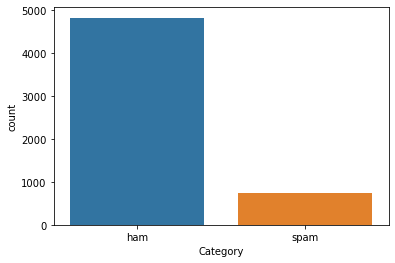

In [23]:
import seaborn as sns
sns.countplot(x='Category', data=dataset)

In [24]:
text = dataset["Text"] 
text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

## Data Preprocessing

In [25]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
       
        
    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
        
        
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):

        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
        
    return lem_text

In [26]:
dataset['Text'] = dataset['Text'].apply(preprocessDataset)
text = dataset['Text']
category = dataset['Category']
text.head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: Text, dtype: object

## Train and Test split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

3900
1672


In [28]:
X_train

630                           plea dont say like hi hi hi
374     thank rington order refer t charg gbp per week...
3814     yet chikku k wat abt tht guy stop irrit msging u
4762                                       prepar pleasur
155                                      aaooooright work
                              ...                        
981                reckon need town eightish walk carpark
937                                            k k colleg
5077    want new nokia i colour phone deliveredtomorro...
4629                              everybodi fun even miss
3674                                            who class
Name: Text, Length: 3900, dtype: object

In [29]:
Y_test

681     ham
5532    ham
670     ham
4682    ham
4996    ham
       ... 
3783    ham
1170    ham
593     ham
3245    ham
739     ham
Name: Category, Length: 1672, dtype: object

In [40]:
from sklearn.naive_bayes import BernoulliNB


nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', BernoulliNB(binarize=0.0)),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()


Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 97% 



In [41]:
target_category = dataset['Category'].unique()
print(classification_report(test_predict, Y_test, target_names=target_category))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1490
        spam       0.80      0.99      0.89       182

    accuracy                           0.97      1672
   macro avg       0.90      0.98      0.94      1672
weighted avg       0.98      0.97      0.97      1672

